2026-01-18 18:27:35.997 | INFO     | src.data.csv_data_feed:__init__:43 - Loading CSV data from C:\Users\rdpuser\projects\trading-bot\trading-bot\data\XAUUSD._H1_2025-12-01_2026-01-18.csv
2026-01-18 18:27:36.018 | INFO     | src.data.csv_data_feed:__init__:52 - Loaded 745 rows from CSV
2026-01-18 18:27:36.019 | INFO     | src.data.csv_data_feed:__init__:53 - Date range: 2025-12-01 12:00:00 to 2026-01-16 23:00:00


symbols_list: [{'symbol': 'XAUUSD', 'csv_file': WindowsPath('C:/Users/rdpuser/projects/trading-bot/trading-bot/data/XAUUSD._H1_2025-12-01_2026-01-18.csv')}]
symbols_list: [{'symbol': 'XAUUSD', 'csv_file': WindowsPath('C:/Users/rdpuser/projects/trading-bot/trading-bot/data/XAUUSD._H1_2025-12-01_2026-01-18.csv')}]
Data Summary:
  XAUUSD:
    CSV File: C:\Users\rdpuser\projects\trading-bot\trading-bot\data\XAUUSD._H1_2025-12-01_2026-01-18.csv
    Total rows: 745
    Data range: 2025-12-01 12:00:00 to 2026-01-16 23:00:00
    Price range: 4163.17000 to 4642.85000

Daily data feed available: XAUUSD_DAILY
2025-12-03 07:00: PENDING  SELL(2) [XAUUSD] Entry: 4221.1199900, Size: 826, TP: 4219.1839580, SL: 4222.3500100, Risk: 1000.0000000 Cash: 100000
2025-12-03 15:00: RUNNING  SELL(9) [XAUUSD] Main Order Filled | Entry=4221.11999 | Size=-826 Cash: 100000
2025-12-03 16:00: SL_HIT  SELL(10) [XAUUSD] SL Hit | Exit=4237.12 | PnL=-13216.008259999791 Cash: 73289
2025-12-03 18:00: PENDING  SELL(13) [XAU

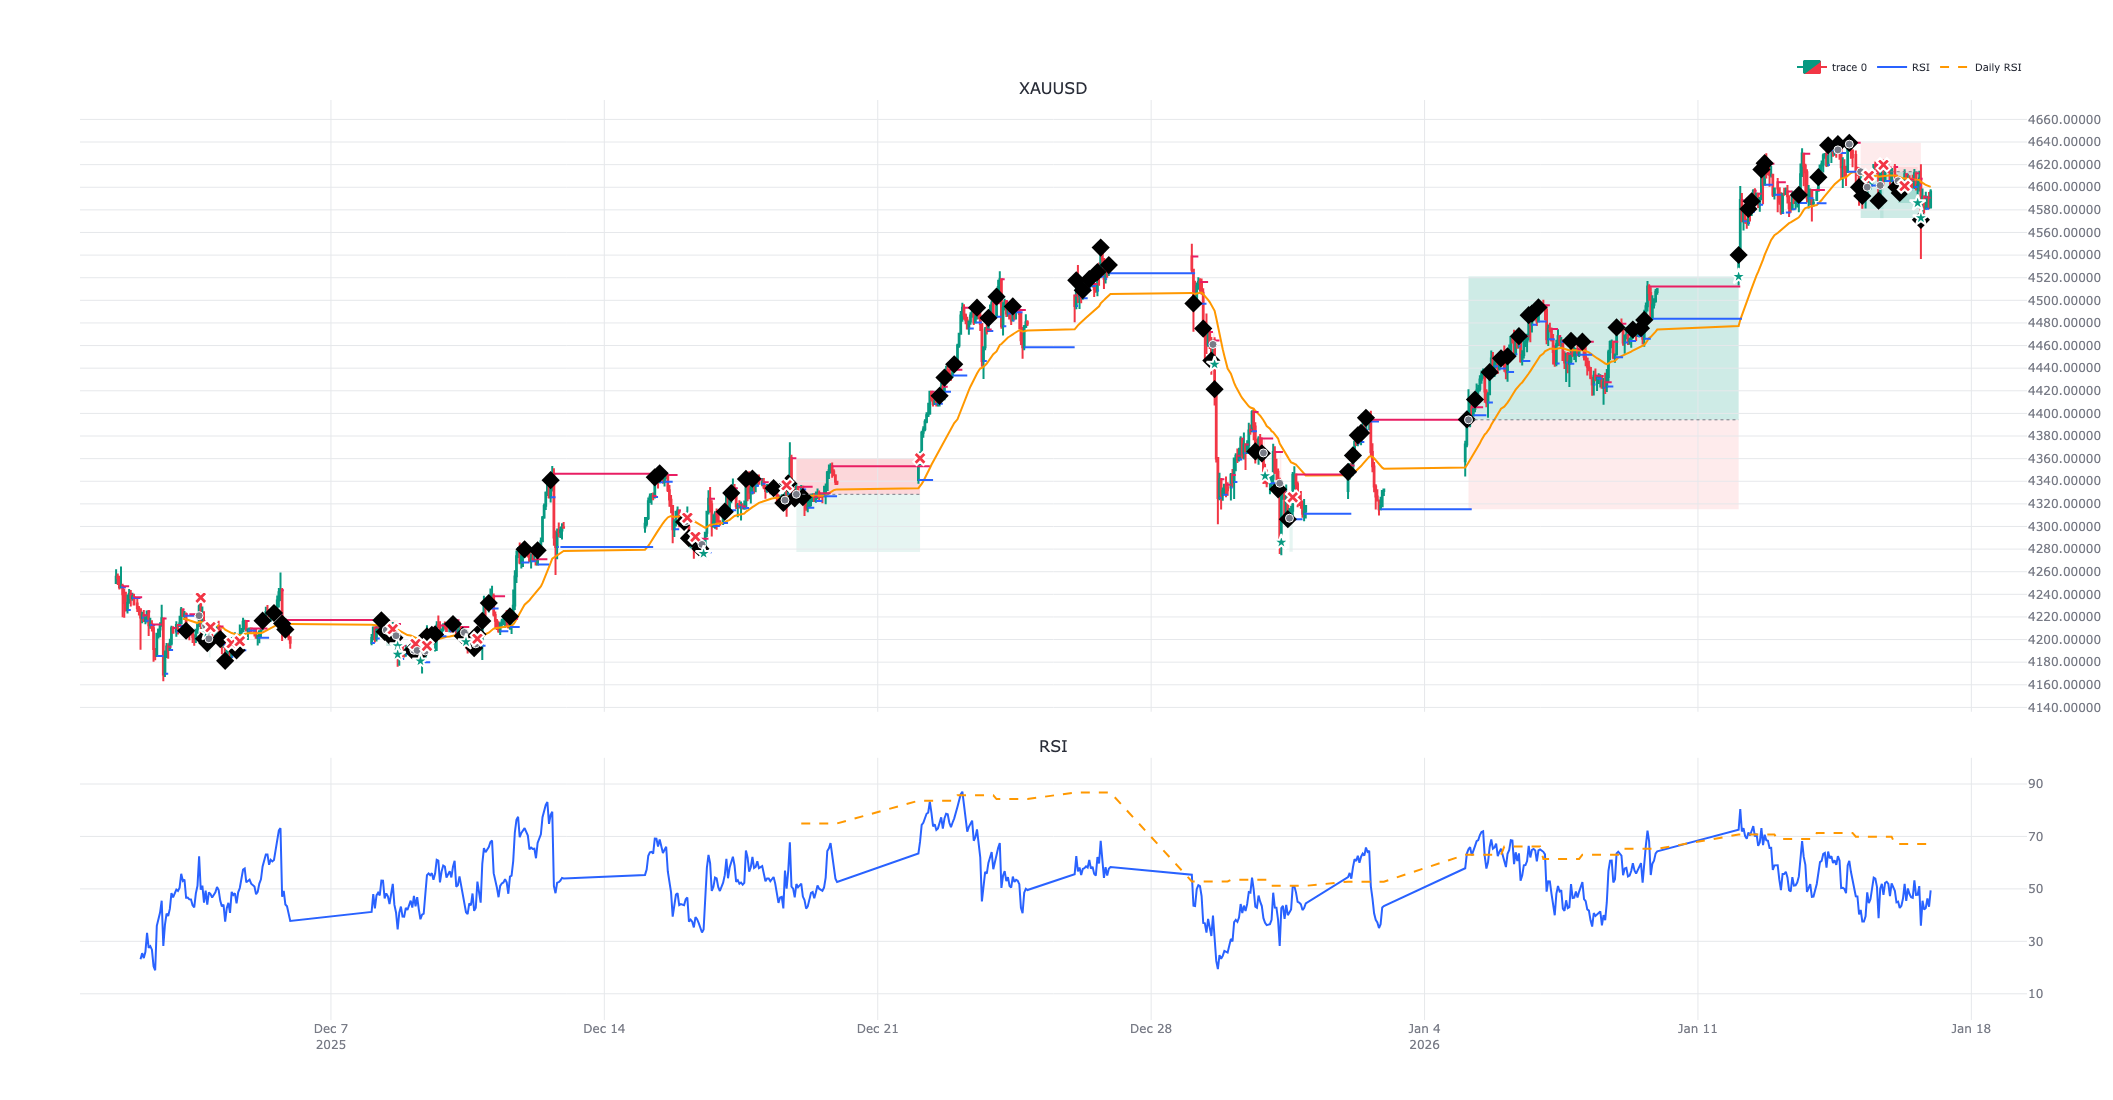

In [5]:
import sys
import os
from datetime import datetime
from dotenv import load_dotenv
original_stdout = sys.stdout
original_stderr = sys.stderr
# sys.stdout = open(os.devnull, 'w')
# sys.stderr = open(os.devnull, 'w')
dotenv_path = os.path.abspath(os.path.join("..", ".env"))
load_dotenv(dotenv_path)

os.environ['ZONE_INVERSION_MARGIN_MICROPIPS'] = '400'  # Zones Tuning
os.environ['BREAKOUT_MIN_STRENGTH_MICROPIPS'] = '100'  # Breakout Tuning
os.environ['MIN_RISK_DISTANCE_MICROPIPS'] = '0.001'
os.environ['RR'] = '2'

notebook_dir = os.getcwd()
if os.path.basename(notebook_dir) == "notebooks":
    parent_dir = os.path.abspath("..")
    if parent_dir not in sys.path:
        sys.path.insert(0, parent_dir)
from src.utils.config import Config
from src.models.timeframe import Timeframe
from src.utils.plot import plotly_plot
from main import backtesting

Config.show_debug_logs = True
# Tuning
# Config.zone_inversion_margin_micropips = 0 # Zones Tuning
# Config.breakout_min_strength_micropips = 100 # Breakout Tuning: We to break at least X amount of micropips in order to consider a breakout as valid
# Config.min_risk_distance_micropips = 0 


max_candles = None
symbols = ['XAUUSD']
timeframe = Timeframe.H1
start_date = datetime(2025, 12, 1, 13, 10, 0)
end_date = datetime.now()



res = backtesting(
        symbols=symbols,
        timeframe=timeframe,
        start_date=start_date,
        end_date=end_date,
        max_candles=max_candles)

for symbol_index, (symbol, pair_data) in enumerate(res['data'].items()):
    plotly_plot(res['cerebro'], pair_data, symbol, symbol_index=symbol_index, height=1100)